# Linear Regression Assignment 

#### Submitted By : Sushant Sarswat (DS C-38)





### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


### Dataset Characteristics:

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Company Aspirations:

The company wants to understand the factors affecting the demand for shared bikes in the American market. The company wants to know:

   * Which variables are significant in predicting the demand for shared bikes.
    
   * How well those variables describe the bike demands.
   

### Business Goals:

   * Model the demand for shared bikes with the available independent variables. 
    
   * The model will be used by the management to understand how exactly the demands vary with different features. This will enable them to accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

## 1. Step 1: Importing Necessary Libraries

In [1]:
# Importing necessary libraries for the task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Step 2: Reading the Dataset and Data Exploration for Understanding

In [2]:
# Read given csv file using Pandas

bike = pd.read_csv('day.csv')

In [3]:
# Checking first few rows for general appreciation

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking Data Shape

bike.shape

(730, 16)

In [5]:
# Checking Data Info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking Statistical Description

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking Data columns

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 2.1 Insight

* The dataset consists of 730 rows and 16 columns

* The dataset has 11 integer columns, 04 float columns and 01 object column

* No Null values are observed in any of the columns

## 3. Step 3: Data Cleaning

In [8]:
# Re-confirming Missing Data, if any

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 3.1 Insight

* There are no Null values in the Dataset

In [9]:
# Checking for Duplicate rows in Dataset. For this we will create a copy of original dataset

bike_dummy = bike
bike_dummy.drop_duplicates(subset=None, inplace=True)

In [10]:
bike_dummy.shape

(730, 16)

### 3.2 Insight

* Since the shape of original dataset and dummy dataset is the same, there are no duplicate rows present in the dataset

### 3.3 Removing unwanted columns

#### The following columns will be removed due to reasons cited against each:

* instant: It is a record index for identifying individual rows.


* dteday: This column contains the dates. Since we have associated information of year, month and weekday available to us in separate columns, this information is redundant.


* casual: count of casual users 

  registered: count of registered users
  
  Since the target column cnt is a sum of casual and registered users, these individual columns have no specific use.


In [11]:
# Removing unwanted columns

bike.drop(['instant'], axis=1, inplace=True)
bike.drop(['dteday'], axis=1, inplace=True)
bike.drop(['casual'], axis=1, inplace=True)
bike.drop(['registered'], axis=1, inplace=True)

In [12]:
# Confirmation of removal of unwanted columns

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Checking Info

bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [14]:
# Checking unique values in each column

bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### 3.4 Insight

* The following columns contain categorical data : 

    season, yr, mnth, holiday, weekday, workingday, weathersit

In [15]:
# Checking value counts of each categorical data

bike.season.value_counts() # (1:spring, 2:summer, 3:fall, 4:winter)

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
bike.yr.value_counts() # Year (0: 2018, 1:2019)

0    365
1    365
Name: yr, dtype: int64

In [17]:
bike.mnth.value_counts() # Month (1 to 12)

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [18]:
bike.holiday.value_counts() # Whether day is a holiday or not 

0    709
1     21
Name: holiday, dtype: int64

In [19]:
bike.weekday.value_counts() # Day of the week

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [20]:
bike.workingday.value_counts() # If day is neither weekend nor holiday is 1, otherwise is 0

1    504
0    226
Name: workingday, dtype: int64

In [21]:
bike.weathersit.value_counts()  # 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

1    463
2    246
3     21
Name: weathersit, dtype: int64

### 3.5 Converting categorical data from integer to object

In [22]:
# We will convert categorical data represented by integer into object. We will allow categories with Binary values to remain as such.

bike.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace = True)
bike.weathersit.replace({1: 'Clear', 2: 'Mist', 3: 'Light_Snow', 4: 'Heavy_Rain'}, inplace = True)
bike.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace = True)
bike.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thurs', 5: 'fri', 6: 'sat'}, inplace = True)

In [23]:
# Confirming categorical changes

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 4. Step 4: Exploratory Data Analysis

### 4.1 Confirmation of applicability of Linear Regression on Dataset

* We will try to ascertain whether the data points exhibit linear characteristics by drawing pairplots

<Figure size 1440x2880 with 0 Axes>

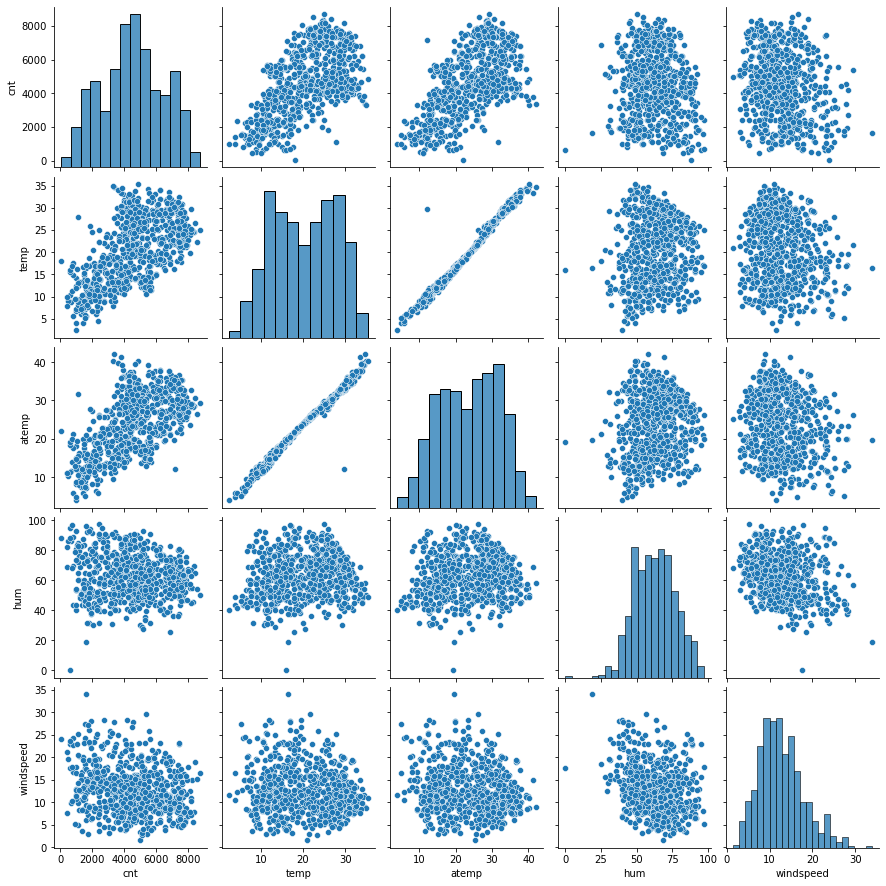

In [24]:
# Drawing Pairplots for continuous numeric variables

plt.figure(figsize = (20,40))
sns.pairplot(data=bike, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

### 4.2 Insight

* Target Variable cnt seems to have linear relationship with temp and atemp.

* temp and atemp seem to have a strong linear relationship.

### 4.3 Correlation Matrix and Heatmap

In [25]:
# Correlation matrix for dataset

corr=bike.corr()
print(corr)

                  yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.002453 -0.027640  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000  


<AxesSubplot:>

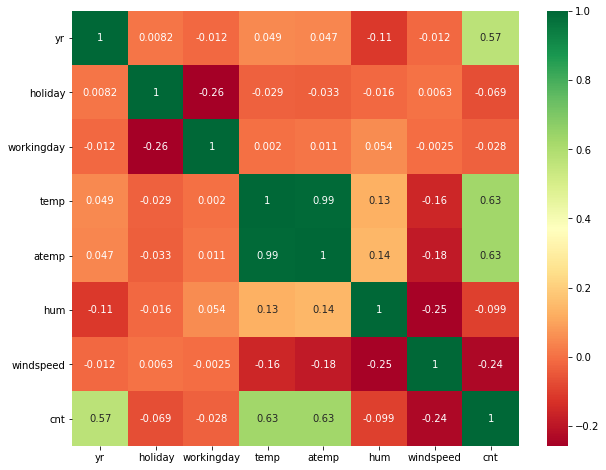

In [26]:
# Heatmap for dataset

plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap ='RdYlGn',annot=True)

### 4.4 Insight

* temp and atemp have a very high correlation of 0.99 (~ 1.0) and therefore we can consider dropping atemp.

* Also, target variable cnt has a correlation with temp and atemp.

### 4.5 Outlier Analysis

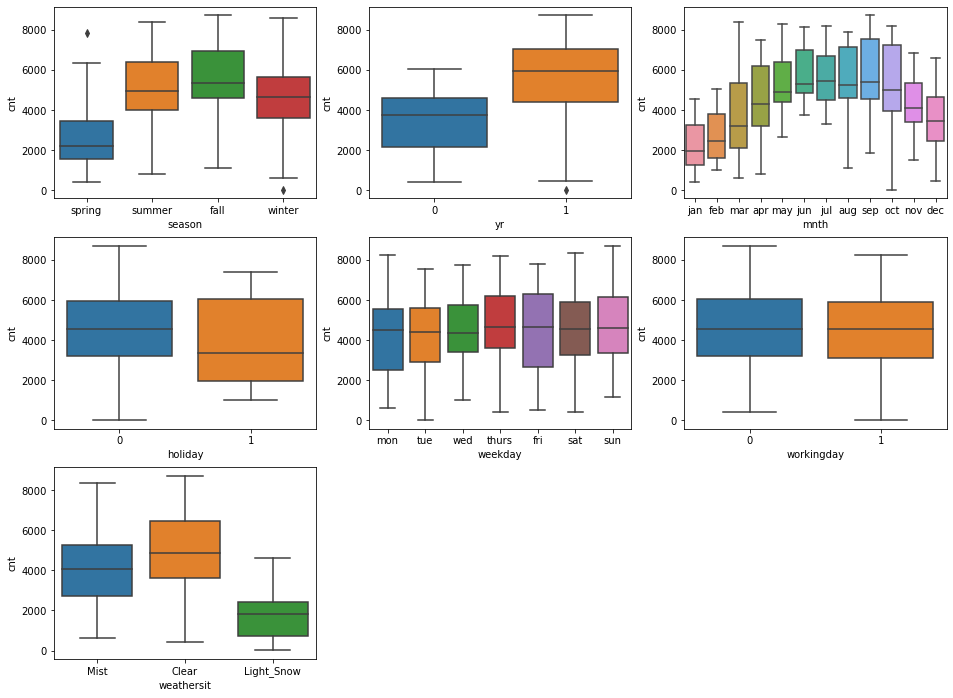

In [27]:
# We will analyse Boxplots for Categorical variables to check for Outliers

vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(16,12))
for i in enumerate(vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

### 4.6 Insight

* Fall has the highest bookings amongst all seasons for the period of two years followed by summer and winter. This indicates season to be good predictor for demand of bikes.

* The demand for bikes in Year 2019 is more than for Year 2018.

* The demand for bikes rises steadily from Jan till Jun, is stable till Sept and gradually declines till Dec thereafter. This is in consonance with the observations of season.

* The demand for bikes is observed to be lower on holiday.

* Overall median across all days is the same. Also, the median is same for working and non-working days.

*  The demand of the bikes is highest on the days when weather is clear, followed by misty days and least on light snow days. There seems to be no demand on days with heavy rain.



## 5. Step 5: Data Preparation

### 5.1 Creation of Dummy Variables

In [28]:
# We will create Dummy variables for categorical variables except for those having Binary values

bike = pd.get_dummies(data=bike, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [29]:
# Confirming dummy column creation

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [30]:
# Checking Dataset rows

bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Checking Dataset shape

bike.shape

(730, 30)

### 5.2 Splitting Data in train and test Dataframes

In [32]:
# Splitting Datframe into train and test data

df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state = 333)

In [33]:
# Verifying shape of train and test data

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [34]:
# Checking training data rows

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,1,0,0,0


### 5.3 Scaling of Features

In [35]:
# We will scale features for ease of interpretation

scaler = MinMaxScaler()  # Creating object of Class MinMaxScaler

In [36]:
# We will scale continuous numeric variables

num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Fitting and transforming training set data only

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [37]:
# Checking training data rows for scaling

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# Checking training data for statistical information

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Step 6: Model Building

### 6.1 Model Building using SKLearn

In [39]:
#Dividing the X and y data of training dataframe

y_train = df_train.pop('cnt') #This removes the target column data of training data and assigns it to y_train
X_train = df_train            #This assigns independent variables to X_train

In [40]:
# We will make a Linear Regression Model using SKLearn

lr=LinearRegression() # Creating object of Linear Regression Class

lr.fit(X_train,y_train)

LinearRegression()

### 6.2 Using Recursive Feature Elimination (RFE) for feature selection

In [41]:
# Since we have lot of independent features, we will employ RFE to select top 15 features using automated approach 
# and thereafter proceed with Manual elimination method

rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
# We will see Array of True/False for X_train depending on selection

rfe.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True,  True])

In [43]:
# We will see the corresponding column index of X_train

X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [44]:
# We will extract column index which are True

col=X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [45]:
# Extracting a new dataset with only RFE filtered features

X_train_rfe=X_train[col]

In [46]:
# Checking rows of new Dataset

X_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jul,mnth_mar,mnth_nov,mnth_sep,weekday_sat,weathersit_Light_Snow,weathersit_Mist
483,1,0.497426,0.487055,0.609956,0.194850,0,0,0,0,0,0,0,0,0,0
650,1,0.416433,0.409971,0.513852,0.255118,0,1,0,0,0,0,0,0,0,0
212,0,0.887856,0.819376,0.572294,0.276919,0,0,0,0,0,0,0,0,0,0
714,1,0.378013,0.381804,0.871429,0.161523,0,1,1,0,0,0,0,0,0,1
8,0,0.098690,0.048706,0.451083,0.700017,1,0,0,0,0,0,0,0,0,0


In [47]:
# Checking shape of new Dataset

X_train_rfe.shape

(510, 15)

### 6.3 Calculating VIF values of new dataset (X_train_rfe) to check for Multicollinearity

In [48]:
vif = pd.DataFrame() # Create a Dataframe for storing variables and respective VIFs
vif['Features'] = X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
1,temp,358.02
2,atemp,354.51
3,hum,22.80
4,windspeed,5.11
6,season_winter,2.75
5,season_spring,2.68
14,weathersit_Mist,2.27
0,yr,2.05
10,mnth_nov,1.83
8,mnth_jul,1.42


### 6.4 Model Building using statsmodels

#### 6.4.1 Model 1

In [49]:
# We will build an initial statsmodels using all 15 features filtered using RFE

# Adding constant

X_train_lm1 = sm.add_constant(X_train_rfe) 


# Creating first fitted model

lm1 = sm.OLS(y_train,X_train_lm1).fit()


# Summary for Model 1

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.78e-183
Time:                        23:55:42   Log-Likelihood:                 501.75
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     494   BIC:                            -903.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

#### 6.4.2 Model 2

In [50]:
# We will drop atemp based on its high VIF value and high p-value. We are not dropping temp intuitively since it is expected 
# to be an important factor in the abovementioned business 

X_train_new = X_train_rfe.drop(['atemp'],axis=1)

In [51]:
# Checking for VIF Values of new DataSet

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,hum,22.37
1,temp,15.94
3,windspeed,4.99
5,season_winter,2.72
4,season_spring,2.67
13,weathersit_Mist,2.26
0,yr,2.05
9,mnth_nov,1.83
7,mnth_jul,1.42
6,mnth_dec,1.41


In [52]:
# Adding constant

X_train_lm2 = sm.add_constant(X_train_new) 

# Creating second fitted model

lm2 = sm.OLS(y_train,X_train_lm2).fit()


# Summary for Model 2

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.68e-184
Time:                        23:55:42   Log-Likelihood:                 501.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     495   BIC:                            -908.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

#### 6.4.3 Model 3

In [53]:
# We will drop hum based on its high VIF value.

X_train_new = X_train_new.drop(['hum'],axis=1)

In [54]:
# Checking for VIF Values of new DataSet

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
1,temp,5.21
2,windspeed,4.96
4,season_winter,2.35
0,yr,2.04
3,season_spring,1.89
8,mnth_nov,1.80
12,weathersit_Mist,1.53
6,mnth_jul,1.38
5,mnth_dec,1.34
7,mnth_mar,1.22


In [55]:
# Adding constant

X_train_lm3 = sm.add_constant(X_train_new) 

# Creating third fitted model

lm3 = sm.OLS(y_train,X_train_lm3).fit()

# Summary for Model 3

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.64e-181
Time:                        23:55:42   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     496   BIC:                            -896.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

#### 6.4.4 Model 4

In [56]:
# We will drop weekday_sat based on its high p-value.

X_train_new = X_train_new.drop(['weekday_sat'],axis=1)

In [57]:
# Checking for VIF Values of new DataSet

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.96
4,season_winter,2.35
0,yr,2.04
3,season_spring,1.89
8,mnth_nov,1.80
11,weathersit_Mist,1.53
6,mnth_jul,1.37
5,mnth_dec,1.34
7,mnth_mar,1.22


In [58]:
# Adding constant

X_train_lm4 = sm.add_constant(X_train_new) 

# Creating fourth fitted model

lm4 = sm.OLS(y_train,X_train_lm4).fit()

# Summary for Model 4

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.26e-182
Time:                        23:55:42   Log-Likelihood:                 489.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     497   BIC:                            -898.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

#### 6.4.5 Model 5

In [59]:
# We will drop mnth_jul based on its high p-value.

X_train_new = X_train_new.drop(['mnth_jul'],axis=1)

In [60]:
# Checking for VIF Values of new DataSet

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,windspeed,4.85
1,temp,4.17
4,season_winter,2.32
0,yr,2.04
3,season_spring,1.89
7,mnth_nov,1.79
10,weathersit_Mist,1.51
5,mnth_dec,1.34
6,mnth_mar,1.21
8,mnth_sep,1.18


In [61]:
# Adding constant

X_train_lm5 = sm.add_constant(X_train_new) 

# Creating fifth fitted model

lm5 = sm.OLS(y_train,X_train_lm5).fit()

# Summary for Model 5

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.32e-181
Time:                        23:55:42   Log-Likelihood:                 486.30
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     498   BIC:                            -897.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

#### 6.4.6 Model 6

In [62]:
# We will drop mnth_dec based on its high p-value.

X_train_new = X_train_new.drop(['mnth_dec'],axis=1)

In [63]:
# Checking for VIF Values of new DataSet

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,windspeed,4.84
1,temp,4.15
0,yr,2.03
4,season_winter,1.92
3,season_spring,1.83
6,mnth_nov,1.64
9,weathersit_Mist,1.51
5,mnth_mar,1.20
7,mnth_sep,1.16
8,weathersit_Light_Snow,1.07


In [64]:
# Adding constant

X_train_lm6 = sm.add_constant(X_train_new) 

# Creating sixth fitted model

lm6 = sm.OLS(y_train,X_train_lm6).fit()

# Summary for Model 6

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.39e-181
Time:                        23:55:42   Log-Likelihood:                 482.02
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

#### 6.4.7 Model 7

In [65]:
# We will drop mnth_nov based on its high p-value.

X_train_new = X_train_new.drop(['mnth_nov'],axis=1)

In [66]:
# Checking for VIF Values of new DataSet

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,windspeed,4.72
1,temp,4.09
0,yr,2.03
3,season_spring,1.82
8,weathersit_Mist,1.50
4,season_winter,1.36
5,mnth_mar,1.20
6,mnth_sep,1.15
7,weathersit_Light_Snow,1.07


In [67]:
# Adding constant

X_train_lm7 = sm.add_constant(X_train_new) 

# Creating seventh fitted model

lm7 = sm.OLS(y_train,X_train_lm7).fit()

# Summary for Model 7

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.76e-181
Time:                        23:55:42   Log-Likelihood:                 479.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     500   BIC:                            -896.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

## 7. Step 7: Model Characteristics

### 7.1 Insight

* The model seems good owing to the following factors:-


    * VIF of all features < 5 indicating very low multicollinearity between features
    * p-values of all features is 0.000, which is less than 0.05
    * Values of R-squared, Adj. R-squared and F-statistic are high
    * Difference between R-squared and Adj. R-squared is very less
    
    
* We will therefore consider Model 7 as Final Model (Unless Test Metrics are not significantly close to this number)

### 7.2 Equation

* The equation as per this model is as follows:

cnt = 0.2618 + (yr x 0.2320) + (temp x 0.4233) - (windspeed x 0.1479) - (season_spring x 0.1255) + (season_winter x 0.0492) + (mnth_mar x 0.0619) + (mnth_sep x 0.0717) - (weathersit_Light_Snow x 0.3136) - (weathersit_Mist x 0.0712)

## 8. Assumption Validation

### 8.1 Error terms are normally distributed with mean zero (Not X and Y)

#### Residual Analysis of Training Data

In [68]:
#Calculating y_train_pred from Model under evaluation

y_train_pred = lm7.predict(X_train_lm7)

In [69]:
#Calculating residual values 

res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

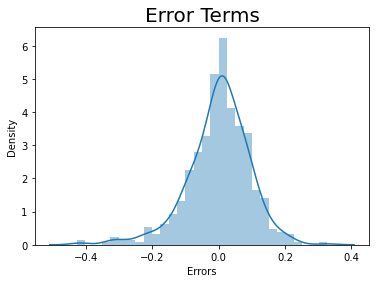

In [70]:
#Plotting histogram of Error Terms

fig = plt.figure()
sns.distplot(res)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors')

### Insight

* The histogram reveals that the Errors are normally distributed with mean of errors centered at 0.
* This reinforces the validity of the Linear Regression Model.

### 8.2 There is a linear relationship between X and Y

<Figure size 1440x2880 with 0 Axes>

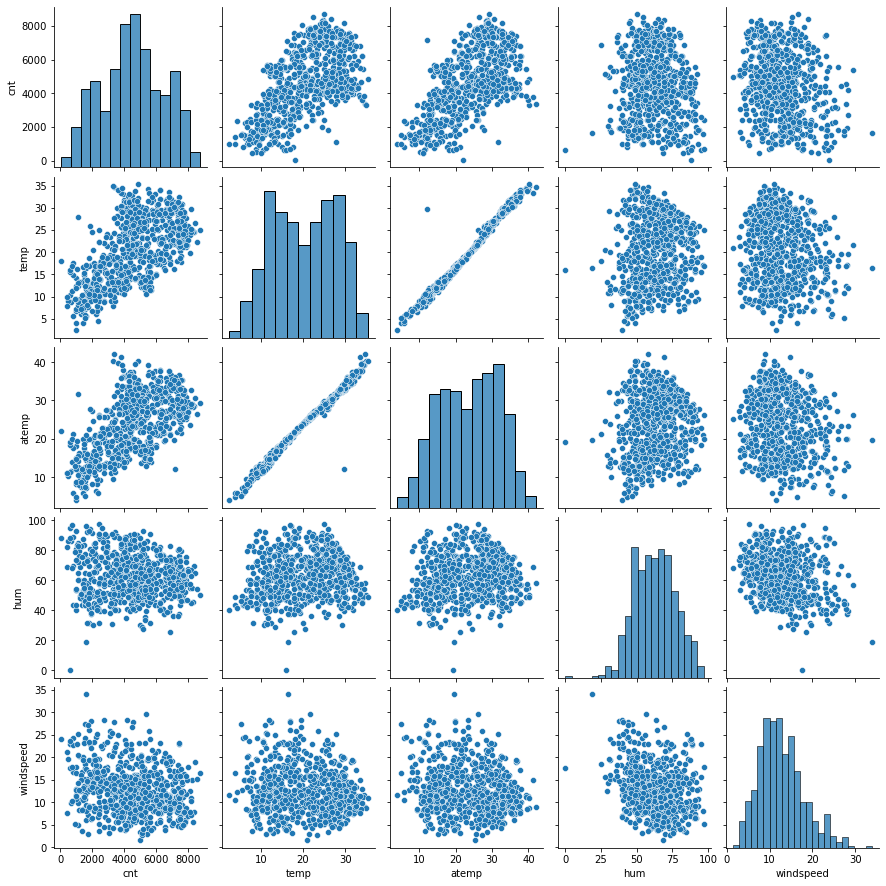

In [71]:
# Drawing Pairplots for continuous numeric variables

plt.figure(figsize = (20,40))
sns.pairplot(data=bike, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

### Insight

* Target Variable cnt seems to have linear relationship with temp and atemp.

### 8.3 There is no Multicollinearity between predictor variables

In [72]:
# Checking for VIF Values of model

vif = pd.DataFrame() 
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
2,windspeed,4.72
1,temp,4.09
0,yr,2.03
3,season_spring,1.82
8,weathersit_Mist,1.50
4,season_winter,1.36
5,mnth_mar,1.20
6,mnth_sep,1.15
7,weathersit_Light_Snow,1.07


### Insight

* Since VIF values are below permissible value of 5.0, there is no multicollinearity between predictor variables. 

## 9. Step8: Predictions using Final Model

#### We will predict values using final model and check the model performance 

In [73]:
# We will scale continuous numeric variables in test data

num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Only transforming test data, no fitting

df_test[num_var] = scaler.transform(df_test[num_var])

In [74]:
# Checking rows of X_test

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,1,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,1,0,0,0,1


In [75]:
# Checking statistical info of X_test

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.086758,0.082192,0.146119,0.141553,0.136986,0.150685,0.123288,0.168950,0.036530,0.324201
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.282125,0.275286,0.354034,0.349389,0.344621,0.358561,0.329520,0.375566,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Segregating X and y values of test dataframe

y_test=df_test.pop('cnt')
X_test=df_test

In [77]:
# Checking rows of X_test

X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_Light_Snow,weathersit_Mist
22,0,0,1,0.046591,0.025950,0.453529,0.462217,1,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0,1,0,...,0,0,0,0,1,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [78]:
# Columns from our final model

X_train_lm7.columns

Index(['const', 'yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_mar', 'mnth_sep', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [79]:
# Selecting values for test data

cols = ['yr','temp', 'windspeed', 'season_spring', 'season_winter','mnth_mar', 'mnth_sep', 'weathersit_Light_Snow', 
        'weathersit_Mist']
X_test_lm7=X_test[cols]
X_test_lm7

,yr,temp,windspeed,season_spring,season_winter,mnth_mar,mnth_sep,weathersit_Light_Snow,weathersit_Mist
22,0,0.046591,0.462217,1,0,0,0,0,0
468,1,0.543115,0.347424,0,0,0,0,0,0
553,1,0.951196,0.212829,0,0,0,0,0,0
504,1,0.699909,0.478229,0,0,0,0,0,0
353,0,0.407087,0.080770,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
237,0,0.798555,0.126931,0,0,0,0,0,0
611,1,0.830744,0.441027,0,0,0,1,0,0
258,0,0.510926,0.292310,0,0,0,1,0,1
518,1,0.677065,0.333343,0,0,0,0,0,0


In [80]:
# Adding constant variable to test data

X_test_lm7 = sm.add_constant(X_test_lm7)

In [81]:
# Checking rows of X_test_lm7

X_test_lm7.head()

,const,yr,temp,windspeed,season_spring,season_winter,mnth_mar,mnth_sep,weathersit_Light_Snow,weathersit_Mist
22,1.0,0,0.046591,0.462217,1,0,0,0,0,0
468,1.0,1,0.543115,0.347424,0,0,0,0,0,0
553,1.0,1,0.951196,0.212829,0,0,0,0,0,0
504,1.0,1,0.699909,0.478229,0,0,0,0,0,0
353,1.0,0,0.407087,0.080770,0,1,0,0,0,1


In [82]:
# Predicting values of Test Data using Final Model (lm7)

y_test_pred = lm7.predict(X_test_lm7)

## 10. Step 9: Model Evaluation

Text(0, 0.5, 'y_test_pred')

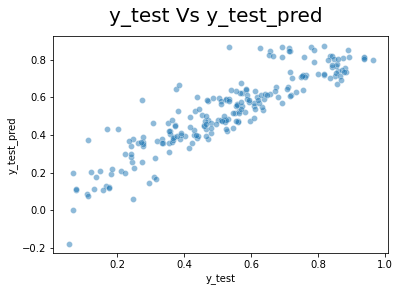

In [83]:
# Plotting y_test and y_test_pred to understand the spread

fig= plt.figure()
sns.scatterplot (y_test, y_test_pred, alpha=0.5)
fig.suptitle('y_test Vs y_test_pred', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

### 10.1 R-squared score

In [84]:
r2_score(y_test, y_test_pred)

0.807135601364511

### 10.2 Inference

* The R-squared value of train data is 0.822 and R-squared value for prediction on test data is 0.807.

* Since both the R-squared values are high and within 5% of each other, our model is performing well even on test (unseen) data.

## 11. Conclusion

* Temperature is a strong factor towards bookings of bikes.

* Year is a strong factor towards bookings of bikes. Therefore, on restoration of situation to normal an increase in demand of bikes is expected.

* Weather situation with Light Snow and Mist indicates reduction of demand of bikes and the lean period may be used towards Bike maintenance.


#### The following features are significant towards prediction of demand for shared bikes:-

In [85]:
lm7.params

const                    0.261843
yr                       0.231999
temp                     0.423293
windspeed               -0.147856
season_spring           -0.125469
season_winter            0.049243
mnth_mar                 0.061856
mnth_sep                 0.071728
weathersit_Light_Snow   -0.313560
weathersit_Mist         -0.071242
dtype: float64

#### Since none of these coefficents is 0, we can reject the NULL HYPOTHESIS, thereby asserting that the model is significant.